In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:

# Challenge 1

# read in the data:
import pandas as pd
df_1 = pd.read_csv('data files/turnstile_190706.txt')
df_2 = pd.read_csv('data files/turnstile_190713.txt')
df_3 = pd.read_csv('data files/turnstile_190720.txt')
df_4 = pd.read_csv('data files/turnstile_190727.txt')
df_5 = pd.read_csv('data files/turnstile_190803.txt')
df_6 = pd.read_csv('data files/turnstile_190810.txt')
df_7 = pd.read_csv('data files/turnstile_190817.txt')
df_8 = pd.read_csv('data files/turnstile_190824.txt')
df_9 = pd.read_csv('data files/turnstile_190831.txt')

#concatenate
df_combined = pd.concat([df_1, df_2, df_3, df_4, df_5, df_6, df_7, df_8, df_9])

In [3]:
# Column name 'EXITS' needs to be formatted to remove extra spaces
print(df_combined.columns)
df_combined.rename(columns={df_combined.columns[10]:'EXITS'}, inplace=True)
print(df_combined.columns)

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')
Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')


In [4]:
# Challenge 2

# What data type did pandas assign values in columns 'Date' and 'Time'?
print(type(df_combined.DATE.iloc[0]), type(df_combined.TIME.iloc[0]))

# Combine 'Date' and 'Time' columns and format into a datetime object
df_combined['DATETIME'] = pd.to_datetime(df_combined['DATE']+ ' ' + df_combined['TIME'])
#df_combined.drop(columns=['DATE','TIME'], inplace=True, axis=1)
print(df_combined.head())

<class 'str'> <class 'str'>
    C/A  UNIT       SCP STATION LINENAME DIVISION        DATE      TIME  \
0  A002  R051  02-00-00   59 ST  NQR456W      BMT  06/29/2019  00:00:00   
1  A002  R051  02-00-00   59 ST  NQR456W      BMT  06/29/2019  08:00:00   
2  A002  R051  02-00-00   59 ST  NQR456W      BMT  06/29/2019  12:00:00   
3  A002  R051  02-00-00   59 ST  NQR456W      BMT  06/29/2019  16:00:00   
4  A002  R051  02-00-00   59 ST  NQR456W      BMT  06/29/2019  20:00:00   

      DESC  ENTRIES    EXITS            DATETIME  
0  REGULAR  7116734  2410183 2019-06-29 00:00:00  
1  REGULAR  7116770  2410218 2019-06-29 08:00:00  
2  REGULAR  7116856  2410288 2019-06-29 12:00:00  
3  REGULAR  7117076  2410346 2019-06-29 16:00:00  
4  REGULAR  7117340  2410387 2019-06-29 20:00:00  


In [5]:
df_combined.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/29/2019,00:00:00,REGULAR,7116734,2410183,2019-06-29 00:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/29/2019,08:00:00,REGULAR,7116770,2410218,2019-06-29 08:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/29/2019,12:00:00,REGULAR,7116856,2410288,2019-06-29 12:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/29/2019,16:00:00,REGULAR,7117076,2410346,2019-06-29 16:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/29/2019,20:00:00,REGULAR,7117340,2410387,2019-06-29 20:00:00


In [6]:
# group by turnstile and date, take the first value for each day
turnstiles_daily = (df_combined
                        .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE"],as_index=False)
                        .first())

In [7]:
turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,DATE,LINENAME,DIVISION,TIME,DESC,ENTRIES,EXITS,DATETIME
0,A002,R051,02-00-00,59 ST,06/29/2019,NQR456W,BMT,00:00:00,REGULAR,7116734,2410183,2019-06-29
1,A002,R051,02-00-00,59 ST,06/30/2019,NQR456W,BMT,00:00:00,REGULAR,7117480,2410406,2019-06-30
2,A002,R051,02-00-00,59 ST,07/01/2019,NQR456W,BMT,00:00:00,REGULAR,7118119,2410590,2019-07-01
3,A002,R051,02-00-00,59 ST,07/02/2019,NQR456W,BMT,00:00:00,REGULAR,7119610,2410993,2019-07-02
4,A002,R051,02-00-00,59 ST,07/03/2019,NQR456W,BMT,00:00:00,REGULAR,7121181,2411468,2019-07-03


In [8]:
turnstiles_daily[["PREV_DATE", "PREV_ENTRIES", "PREV_EXITS"]] = (turnstiles_daily
                                                       .groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES", "EXITS"]
                                                       .apply(lambda grp: grp.shift(1)))

<ipython-input-8-a52010f25ff0>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  turnstiles_daily[["PREV_DATE", "PREV_ENTRIES", "PREV_EXITS"]] = (turnstiles_daily


In [9]:
turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,DATE,LINENAME,DIVISION,TIME,DESC,ENTRIES,EXITS,DATETIME,PREV_DATE,PREV_ENTRIES,PREV_EXITS
0,A002,R051,02-00-00,59 ST,06/29/2019,NQR456W,BMT,00:00:00,REGULAR,7116734,2410183,2019-06-29,NaN,NaN,NaN
1,A002,R051,02-00-00,59 ST,06/30/2019,NQR456W,BMT,00:00:00,REGULAR,7117480,2410406,2019-06-30,06/29/2019,7116734.0,2410183.0
2,A002,R051,02-00-00,59 ST,07/01/2019,NQR456W,BMT,00:00:00,REGULAR,7118119,2410590,2019-07-01,06/30/2019,7117480.0,2410406.0
3,A002,R051,02-00-00,59 ST,07/02/2019,NQR456W,BMT,00:00:00,REGULAR,7119610,2410993,2019-07-02,07/01/2019,7118119.0,2410590.0
4,A002,R051,02-00-00,59 ST,07/03/2019,NQR456W,BMT,00:00:00,REGULAR,7121181,2411468,2019-07-03,07/02/2019,7119610.0,2410993.0


In [10]:
# remove NaN
turnstiles_daily.dropna(subset=['PREV_DATE'],axis=0,inplace=True)

In [11]:
turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,DATE,LINENAME,DIVISION,TIME,DESC,ENTRIES,EXITS,DATETIME,PREV_DATE,PREV_ENTRIES,PREV_EXITS
1,A002,R051,02-00-00,59 ST,06/30/2019,NQR456W,BMT,00:00:00,REGULAR,7117480,2410406,2019-06-30,06/29/2019,7116734.0,2410183.0
2,A002,R051,02-00-00,59 ST,07/01/2019,NQR456W,BMT,00:00:00,REGULAR,7118119,2410590,2019-07-01,06/30/2019,7117480.0,2410406.0
3,A002,R051,02-00-00,59 ST,07/02/2019,NQR456W,BMT,00:00:00,REGULAR,7119610,2410993,2019-07-02,07/01/2019,7118119.0,2410590.0
4,A002,R051,02-00-00,59 ST,07/03/2019,NQR456W,BMT,00:00:00,REGULAR,7121181,2411468,2019-07-03,07/02/2019,7119610.0,2410993.0
5,A002,R051,02-00-00,59 ST,07/04/2019,NQR456W,BMT,00:00:00,REGULAR,7122652,2411887,2019-07-04,07/03/2019,7121181.0,2411468.0


In [12]:
# check which stations have turnstiles with fewer ENTRIES than the previous day
(turnstiles_daily[turnstiles_daily["ENTRIES"] < turnstiles_daily["PREV_ENTRIES"]]
    .groupby(["C/A", "UNIT", "SCP", "STATION"])
    .size())

C/A   UNIT  SCP       STATION        
A002  R051  02-06-00  59 ST               1
A007  R079  01-05-01  5 AV/59 ST          1
A011  R080  01-03-00  57 ST-7 AV         10
A025  R023  01-03-01  34 ST-HERALD SQ    62
A035  R170  00-00-01  14 ST-UNION SQ      1
                                         ..
R622  R123  00-00-00  FRANKLIN AV        62
R629  R065  00-00-01  ROCKAWAY AV         1
R645  R110  00-03-02  FLATBUSH AV-B.C     2
R646  R110  01-00-01  FLATBUSH AV-B.C    62
R730  R431  00-00-04  EASTCHSTER/DYRE    58
Length: 193, dtype: int64

In [13]:
# check which stations have turnstiles with fewer EXITS than the previous day
(turnstiles_daily[turnstiles_daily["EXITS"] < turnstiles_daily["PREV_EXITS"]]
    .groupby(["C/A", "UNIT", "SCP", "STATION"])
    .size())

C/A   UNIT  SCP       STATION        
A002  R051  02-06-00  59 ST               1
A007  R079  01-05-01  5 AV/59 ST          1
A011  R080  01-03-00  57 ST-7 AV         13
A035  R170  00-00-01  14 ST-UNION SQ      1
A043  R462  00-03-03  CANAL ST            1
                                         ..
R621  R060  00-03-01  EASTN PKWY-MUSM     1
R622  R123  00-00-00  FRANKLIN AV        62
R629  R065  00-00-01  ROCKAWAY AV         1
R645  R110  00-03-02  FLATBUSH AV-B.C     2
R646  R110  01-00-01  FLATBUSH AV-B.C    62
Length: 186, dtype: int64

In [14]:
# If the counter is reversed, make negative values positive
# If difference between days is >= 1 million, set daily ENTRIES to min value between ENTRIES and prev_ENTRIES
def get_daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        # Maybe counter is reversed?
        counter = -counter
    if counter > max_counter:
        # Maybe counter was reset to 0? 
        #print(row["ENTRIES"], row["PREV_ENTRIES"])
        counter = 0
    if counter > max_counter:
        # Check it again to make sure we're not still giving a counter that's too big
        return 0
    return counter

# If counter is > 1Million, then the counter might have been reset.  
# Just set it to zero as different counters have different cycle limits
# It'd probably be a good idea to use a number even significantly smaller than 1 million as the limit!
turnstiles_daily["DAILY_ENTRIES"] = turnstiles_daily.apply(get_daily_counts, axis=1, max_counter=1000000)

In [15]:
# If the counter is reversed, make negative values positive
# If difference between days is >= 1 million, set daily EXITS to min value between EXITS and prev_EXITS
def get_daily_counts(row, max_counter):
    counter = row["EXITS"] - row["PREV_EXITS"]
    if counter < 0:
        # Maybe counter is reversed?
        counter = -counter
    if counter > max_counter:
        # Maybe counter was reset to 0? 
        #print(row["EXITS"], row["PREV_EXITS"])
        counter = 0
    if counter > max_counter:
        # Check it again to make sure we're not still giving a counter that's too big
        return 0
    return counter

# If counter is > 1Million, then the counter might have been reset.  
# Just set it to zero as different counters have different cycle limits
# It'd probably be a good idea to use a number even significantly smaller than 1 million as the limit!
turnstiles_daily["DAILY_EXITS"] = turnstiles_daily.apply(get_daily_counts, axis=1, max_counter=1000000)

In [16]:
#clean entries
mask_entries = (turnstiles_daily["DAILY_ENTRIES"] != 0)
turnstiles_daily_entries_clean = turnstiles_daily[mask_entries]

In [17]:
turnstiles_daily_entries_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 270016 entries, 1 to 307527
Data columns (total 17 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   C/A            270016 non-null  object        
 1   UNIT           270016 non-null  object        
 2   SCP            270016 non-null  object        
 3   STATION        270016 non-null  object        
 4   DATE           270016 non-null  object        
 5   LINENAME       270016 non-null  object        
 6   DIVISION       270016 non-null  object        
 7   TIME           270016 non-null  object        
 8   DESC           270016 non-null  object        
 9   ENTRIES        270016 non-null  int64         
 10  EXITS          270016 non-null  int64         
 11  DATETIME       270016 non-null  datetime64[ns]
 12  PREV_DATE      270016 non-null  object        
 13  PREV_ENTRIES   270016 non-null  float64       
 14  PREV_EXITS     270016 non-null  float64       
 15  

In [18]:
#clean exits from the cleaned entries df
mask_exits = (turnstiles_daily_entries_clean["DAILY_EXITS"] != 0)
turnstiles_daily_exits_clean = turnstiles_daily_entries_clean[mask_exits]

In [19]:
turnstiles_daily_exits_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 262536 entries, 1 to 307464
Data columns (total 17 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   C/A            262536 non-null  object        
 1   UNIT           262536 non-null  object        
 2   SCP            262536 non-null  object        
 3   STATION        262536 non-null  object        
 4   DATE           262536 non-null  object        
 5   LINENAME       262536 non-null  object        
 6   DIVISION       262536 non-null  object        
 7   TIME           262536 non-null  object        
 8   DESC           262536 non-null  object        
 9   ENTRIES        262536 non-null  int64         
 10  EXITS          262536 non-null  int64         
 11  DATETIME       262536 non-null  datetime64[ns]
 12  PREV_DATE      262536 non-null  object        
 13  PREV_ENTRIES   262536 non-null  float64       
 14  PREV_EXITS     262536 non-null  float64       
 15  

In [20]:
#rename final cleaned entries and exits df for easier reference
turnstiles_daily_cleaned = turnstiles_daily_exits_clean

In [21]:
turnstiles_daily_cleaned.head()

,C/A,UNIT,SCP,STATION,DATE,LINENAME,DIVISION,TIME,DESC,ENTRIES,EXITS,DATETIME,PREV_DATE,PREV_ENTRIES,PREV_EXITS,DAILY_ENTRIES,DAILY_EXITS
1,A002,R051,02-00-00,59 ST,06/30/2019,NQR456W,BMT,00:00:00,REGULAR,7117480,2410406,2019-06-30,06/29/2019,7116734.0,2410183.0,746.0,223.0
2,A002,R051,02-00-00,59 ST,07/01/2019,NQR456W,BMT,00:00:00,REGULAR,7118119,2410590,2019-07-01,06/30/2019,7117480.0,2410406.0,639.0,184.0
3,A002,R051,02-00-00,59 ST,07/02/2019,NQR456W,BMT,00:00:00,REGULAR,7119610,2410993,2019-07-02,07/01/2019,7118119.0,2410590.0,1491.0,403.0
4,A002,R051,02-00-00,59 ST,07/03/2019,NQR456W,BMT,00:00:00,REGULAR,7121181,2411468,2019-07-03,07/02/2019,7119610.0,2410993.0,1571.0,475.0
5,A002,R051,02-00-00,59 ST,07/04/2019,NQR456W,BMT,00:00:00,REGULAR,7122652,2411887,2019-07-04,07/03/2019,7121181.0,2411468.0,1471.0,419.0


In [22]:
turnstiles_daily_cleaned['DAILY_TOTALS'] = turnstiles_daily_cleaned.apply(lambda row: row.DAILY_ENTRIES + row.DAILY_EXITS, axis=1)

<ipython-input-22-0b594facd523>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  turnstiles_daily_cleaned['DAILY_TOTALS'] = turnstiles_daily_cleaned.apply(lambda row: row.DAILY_ENTRIES + row.DAILY_EXITS, axis=1)


In [23]:
turnstiles_daily_cleaned.head()

,C/A,UNIT,SCP,STATION,DATE,LINENAME,DIVISION,TIME,DESC,ENTRIES,EXITS,DATETIME,PREV_DATE,PREV_ENTRIES,PREV_EXITS,DAILY_ENTRIES,DAILY_EXITS,DAILY_TOTALS
1,A002,R051,02-00-00,59 ST,06/30/2019,NQR456W,BMT,00:00:00,REGULAR,7117480,2410406,2019-06-30,06/29/2019,7116734.0,2410183.0,746.0,223.0,969.0
2,A002,R051,02-00-00,59 ST,07/01/2019,NQR456W,BMT,00:00:00,REGULAR,7118119,2410590,2019-07-01,06/30/2019,7117480.0,2410406.0,639.0,184.0,823.0
3,A002,R051,02-00-00,59 ST,07/02/2019,NQR456W,BMT,00:00:00,REGULAR,7119610,2410993,2019-07-02,07/01/2019,7118119.0,2410590.0,1491.0,403.0,1894.0
4,A002,R051,02-00-00,59 ST,07/03/2019,NQR456W,BMT,00:00:00,REGULAR,7121181,2411468,2019-07-03,07/02/2019,7119610.0,2410993.0,1571.0,475.0,2046.0
5,A002,R051,02-00-00,59 ST,07/04/2019,NQR456W,BMT,00:00:00,REGULAR,7122652,2411887,2019-07-04,07/03/2019,7121181.0,2411468.0,1471.0,419.0,1890.0


# Busiest Station

In [24]:
# First get sum of all turnstiles at each station for each day
# ...then take the average across all days
# ...this shows the station that has the highest daily average
busiest_stations = turnstiles_daily_cleaned.groupby(['STATION','DATE']).sum()\
.groupby(['STATION']).mean().sort_values('DAILY_TOTALS', ascending=False).reset_index()
busiest_stations

,STATION,ENTRIES,EXITS,PREV_ENTRIES,PREV_EXITS,DAILY_ENTRIES,DAILY_EXITS,DAILY_TOTALS
0,GRD CNTRL-42 ST,2.279539e+09,3.139953e+09,2.279426e+09,3.139863e+09,176672.532258,125305.741935,301978.274194
1,34 ST-PENN STA,3.463442e+09,3.869942e+09,3.463312e+09,3.869823e+09,143872.451613,133180.838710,277053.290323
2,34 ST-HERALD SQ,4.064813e+09,5.221403e+09,4.064716e+09,5.221301e+09,106574.225806,101718.435484,208292.661290
3,TIMES SQ-42 ST,5.781866e+09,3.134902e+09,5.781783e+09,3.134819e+09,88028.096774,82760.161290,170788.258065
4,23 ST,5.617788e+09,4.890424e+09,5.617705e+09,4.890357e+09,98215.016129,70176.064516,168391.080645
...,...,...,...,...,...,...,...,...
373,BEACH 44 ST,2.425780e+06,2.164881e+06,2.425149e+06,2.164120e+06,631.225806,760.483871,1391.709677
374,BEACH 105 ST,1.470087e+06,1.960951e+06,1.469625e+06,1.960515e+06,462.032258,435.548387,897.580645
375,BROAD CHANNEL,1.400036e+06,2.107390e+05,1.399767e+06,2.106515e+05,269.435484,87.548387,356.983871
376,ORCHARD BEACH,4.513993e+05,2.832629e+04,4.512234e+05,2.829347e+04,175.868421,32.815789,208.684211


In [34]:
top30stations = busiest_stations[: 30: ]
top30stations

,STATION,ENTRIES,EXITS,PREV_ENTRIES,PREV_EXITS,DAILY_ENTRIES,DAILY_EXITS,DAILY_TOTALS
0,GRD CNTRL-42 ST,2.279539e+09,3.139953e+09,2.279426e+09,3.139863e+09,176672.532258,125305.741935,301978.274194
1,34 ST-PENN STA,3.463442e+09,3.869942e+09,3.463312e+09,3.869823e+09,143872.451613,133180.838710,277053.290323
2,34 ST-HERALD SQ,4.064813e+09,5.221403e+09,4.064716e+09,5.221301e+09,106574.225806,101718.435484,208292.661290
3,TIMES SQ-42 ST,5.781866e+09,3.134902e+09,5.781783e+09,3.134819e+09,88028.096774,82760.161290,170788.258065
4,23 ST,5.617788e+09,4.890424e+09,5.617705e+09,4.890357e+09,98215.016129,70176.064516,168391.080645
5,42 ST-PORT AUTH,7.366605e+09,6.199558e+09,7.366534e+09,6.199488e+09,90768.725806,75248.274194,166017.000000
6,14 ST-UNION SQ,4.084056e+08,2.448519e+08,4.083230e+08,2.447736e+08,82603.870968,78306.596774,160910.467742
7,FULTON ST,4.068000e+09,2.905280e+09,4.067922e+09,2.905210e+09,80994.403226,70656.548387,151650.951613
8,86 ST,1.811002e+09,2.408888e+09,1.810941e+09,2.408829e+09,70070.451613,64198.693548,134269.145161
9,CANAL ST,4.044142e+09,5.432206e+09,4.044079e+09,5.432154e+09,70102.129032,52248.935484,122351.064516


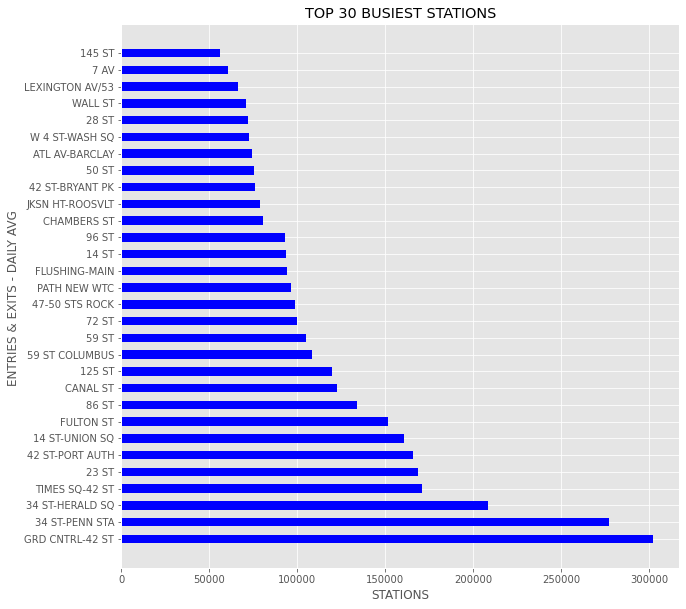

<Figure size 432x288 with 0 Axes>

In [74]:
%matplotlib inline
plt.style.use('ggplot')
plt.figure(figsize=(10, 10))

x = top30stations['STATION']
y = top30stations['DAILY_TOTALS']

plt.barh(x_pos, y, height = 0.5, color = "b")
plt.xlabel("STATIONS")
plt.ylabel("ENTRIES & EXITS - DAILY AVG ")
plt.title("TOP 30 BUSIEST STATIONS")

plt.yticks(x_pos, x)

plt.show()

plt.savefig('Top30Stations.png')

# Busiest day of the week

In [ ]:
turnstiles_daily_cleaned.head()

## ...first, the busiest day of the summer

In [ ]:
# Get the sum of all turnstiles on each day for each station
busiest_single_day = turnstiles_daily_cleaned.groupby(['STATION','DATETIME']).sum()\
.reset_index().sort_values('DAILY_TOTALS', ascending=False)
busiest_single_day.head()

In [ ]:
# Convert Date to day of the week
# Monday=0, Sunday=6
busiest_single_day["dayOfWeek"] = busiest_single_day.DATETIME.dt.dayofweek
busiest_single_day.head()

## Average busiest days of the week

In [ ]:
avg_daily = busiest_single_day.groupby(['STATION','dayOfWeek']).mean()\
.sort_values('DAILY_TOTALS', ascending=False)
avg_daily.head(20)

# Busiest time of day

In [ ]:
df_combined.head()

In [ ]:
df_combined.reset_index(inplace=True)

In [ ]:
# focus on just the top 30 busiest stations
top_stations_list = busiest_stations['STATION'][0:30]
top_stations = df_combined[df_combined['STATION'].isin(top_stations_list)]

In [ ]:
# Add day of the week so we can later group by day
top_stations["dayOfWeek"] = top_stations.DATETIME.dt.dayofweek

In [ ]:
top_stations.head()

In [ ]:
top_stations[["PREV_TIME", "PREV_ENTRIES", "PREV_EXITS"]] = (\
top_stations.groupby(["C/A", "UNIT", "SCP", "STATION", "DATE"])["TIME", "ENTRIES", "EXITS"]\
.apply(lambda grp: grp.shift(1)))

In [ ]:
top_stations.head()

In [ ]:
#11
# remove NaN
top_stations.dropna(subset=['PREV_TIME'],axis=0,inplace=True)
top_stations.head()

In [ ]:
#13
# check which stations have turnstiles with fewer ENTRIES than the previous day
(top_stations[top_stations["ENTRIES"] < top_stations["PREV_ENTRIES"]]
    .groupby(["C/A", "UNIT", "SCP", "STATION"])
    .size())

In [ ]:
#14
# check which stations have turnstiles with fewer EXITS than the previous day
(top_stations[top_stations["EXITS"] < top_stations["PREV_EXITS"]]
    .groupby(["C/A", "UNIT", "SCP", "STATION"])
    .size())

In [ ]:
#15
# If the counter is reversed, make negative values positive
# If difference between days is >= 20,000 , set daily ENTRIES to min value between ENTRIES and prev_ENTRIES
def get_daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        # Maybe counter is reversed?
        counter = -counter
    if counter > max_counter:
        # Maybe counter was reset to 0? 
        #print(row["ENTRIES"], row["PREV_ENTRIES"])
        counter = 0
    if counter > max_counter:
        # Check it again to make sure we're not still giving a counter that's too big
        return 0
    return counter

# If counter is > 1Million, then the counter might have been reset.  
# Just set it to zero as different counters have different cycle limits
# It'd probably be a good idea to use a number even significantly smaller than 1 million as the limit!
top_stations["DAILY_ENTRIES"] = top_stations.apply(get_daily_counts, axis=1, max_counter=20000)

In [ ]:
#16
# If the counter is reversed, make negative values positive
# If difference between days is >= 20,000, set daily EXITS to min value between EXITS and prev_EXITS
def get_daily_counts(row, max_counter):
    counter = row["EXITS"] - row["PREV_EXITS"]
    if counter < 0:
        # Maybe counter is reversed?
        counter = -counter
    if counter > max_counter:
        # Maybe counter was reset to 0? 
        #print(row["EXITS"], row["PREV_EXITS"])
        counter = 0
    if counter > max_counter:
        # Check it again to make sure we're not still giving a counter that's too big
        return 0
    return counter

# If counter is > 1Million, then the counter might have been reset.  
# Just set it to zero as different counters have different cycle limits
# It'd probably be a good idea to use a number even significantly smaller than 1 million as the limit!
top_stations["DAILY_EXITS"] = top_stations.apply(get_daily_counts, axis=1, max_counter=20000)

In [ ]:
#17
#clean entries
mask_entries = (top_stations["DAILY_ENTRIES"] != 0)
top_stations_clean = top_stations[mask_entries]

In [ ]:
top_stations_clean.head()

In [ ]:
#19
#clean exits from the cleaned entries df
mask_exits = (top_stations_clean["DAILY_EXITS"] != 0)
top_stations_clean = top_stations_clean[mask_exits]

In [ ]:
top_stations_clean.head()

In [ ]:
top_stations_clean['DAILY_TOTALS'] = top_stations_clean.apply(lambda row: row.DAILY_ENTRIES + row.DAILY_EXITS, axis=1)

In [ ]:
top_stations_clean.info()

In [ ]:
top_stations_clean['dtTIME'] = pd.to_datetime(top_stations_clean['TIME'], format="%H:%M:%S").dt.time
top_stations_clean['dtPREV_TIME'] = pd.to_datetime(top_stations_clean['PREV_TIME'], format="%H:%M:%S").dt.time

In [ ]:
top_stations_clean.head()

In [ ]:
import datetime
time_morning = datetime.datetime.strptime('08:00:00', '%H:%M:%S').time()
time_noon = datetime.datetime.strptime('12:00:00', '%H:%M:%S').time()
time_afternoon = datetime.datetime.strptime('16:00:00', '%H:%M:%S').time()
time_evening = datetime.datetime.strptime('20:00:00', '%H:%M:%S').time()

In [ ]:
mask = ((top_stations_clean['dtPREV_TIME'] >= time_morning) & (top_stations_clean['dtTIME'] <= time_noon))
morning_stations = top_stations_clean[mask]
morning_stations

In [ ]:
mask = ((top_stations_clean['dtPREV_TIME'] >= time_noon) & (top_stations_clean['dtTIME'] <= time_afternoon))
afternoon_stations = top_stations_clean[mask]
afternoon_stations

In [ ]:
mask = ((top_stations_clean['dtPREV_TIME'] >= time_afternoon) & (top_stations_clean['dtTIME'] <= time_evening))
evening_stations = top_stations_clean[mask]
evening_stations

In [ ]:
# First add up turnstiles for each station on each date
# then take the average across all days

morning_group = morning_stations.groupby(['STATION','DATE']).sum()\
.groupby(['STATION','dayOfWeek']).mean().sort_values('DAILY_TOTALS', ascending=False).reset_index()

afternoon_group = afternoon_stations.groupby(['STATION','DATE']).sum()\
.groupby(['STATION','dayOfWeek']).mean().sort_values('DAILY_TOTALS', ascending=False).reset_index()

evening_group = evening_stations.groupby(['STATION','DATE']).sum()\
.groupby(['STATION','dayOfWeek']).mean().sort_values('DAILY_TOTALS', ascending=False).reset_index()


